<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 4 - Regression </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>

# Problem Description
In this assignment, we work with PySpark, which is the Python API for Apache Spark. It enables performing real-time, large-scale data processing in a distributed environment using Python.

In [38]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

### WARMUP :

In [4]:
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target

df.info()
df.describe()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [5]:
print("\nData types of features:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())


Data types of features:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Missing values per column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [6]:
scaler = StandardScaler()
df[diabetes.feature_names] = scaler.fit_transform(df[diabetes.feature_names])
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0
5,-1.948811,-0.938537,-0.855583,-0.408741,-1.450445,-1.666931,0.867796,-1.606102,-0.865679,-2.025562,97.0
6,-0.956004,1.065488,-0.991541,-0.336359,-0.842963,-0.521390,0.016374,-0.830301,-1.322752,-0.806403,138.0
7,1.335088,1.065488,-0.039834,1.400804,1.905174,2.289794,0.480786,0.372192,-0.752992,0.064426,63.0
8,0.876870,1.065488,1.297088,-0.843032,-0.293335,0.130383,-0.602843,-0.054499,-0.314510,0.238591,110.0
9,-1.490592,-0.938537,0.821235,-0.698268,-0.264408,-0.725481,-0.525441,-0.054499,1.424090,-0.283906,310.0


In [7]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Train DataFrame:")
train_df

Train DataFrame:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
17,1.487828,1.065488,0.254742,1.183659,0.719136,1.038916,-0.835049,0.721302,0.575296,-0.022657,144.0
66,-0.192307,1.065488,-0.379729,-0.698268,-0.437974,0.255471,-1.531667,1.497104,0.005729,0.412757,150.0
137,0.113172,-0.938537,1.047832,2.052240,-0.322263,-0.343634,-0.138431,-0.054499,0.358163,-0.283906,280.0
245,-0.574155,-0.938537,-0.742285,-0.625886,-1.190096,-1.232416,0.635590,-0.830301,-1.048508,-2.722224,125.0
31,-0.497786,-0.938537,-1.376756,-1.711613,-0.814035,-1.127079,1.254806,-1.606102,-0.780589,-0.893485,59.0
...,...,...,...,...,...,...,...,...,...,...,...
106,-2.025181,-0.938537,-1.603353,-0.915414,-0.958674,-0.732065,0.171178,-0.830301,-1.250310,-1.764314,134.0
270,0.113172,1.065488,0.639957,1.762713,-0.785107,-0.995407,0.325982,-0.830301,0.181658,0.325674,202.0
348,0.647761,-0.938537,-0.425049,-0.119214,-0.090841,-0.620144,1.641816,-0.830301,-0.229228,-0.022657,148.0
435,-0.268676,-0.938537,-0.493028,-0.843032,-0.351191,0.097465,-0.370637,-0.054499,-0.808569,-0.806403,64.0


In [8]:
print("\nTest DataFrame:")
test_df


Test DataFrame:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
287,0.953240,-0.938537,-0.130473,-0.336359,2.628368,2.632139,0.403384,0.721302,0.681851,-0.109740,219.0
211,1.946046,-0.938537,0.775915,0.459841,-0.524757,-0.350218,0.016374,-0.830301,-0.473383,-0.458071,70.0
72,1.335088,1.065488,-0.085153,-0.263977,2.165524,1.025748,1.177404,-0.054499,1.776333,-0.370989,202.0
321,2.022416,-0.938537,1.093151,1.666445,1.153052,0.768989,-1.609069,2.971127,2.073957,1.283585,230.0
73,0.265912,1.065488,-0.425049,-0.046832,0.805919,1.117918,-0.138431,0.721302,-0.108108,-0.196823,111.0
...,...,...,...,...,...,...,...,...,...,...,...
255,0.036803,-0.938537,-1.376756,-0.119214,-0.148697,-0.409470,0.867796,-0.830301,-0.069396,0.151508,153.0
90,0.265912,-0.938537,-0.538347,-0.843032,-0.640468,-0.949322,1.641816,-1.606102,-1.516504,0.238591,98.0
57,-0.574155,-0.938537,-1.331437,-1.060177,-1.884362,-2.193617,1.100002,-1.606102,-1.180551,-1.415982,37.0
391,-0.497786,-0.938537,-1.467395,-1.349704,-1.247951,-1.061243,0.403384,-0.830301,-1.873921,-1.067651,63.0


### Part1 : Functions’ Implementation

1. Mean Squared Error (MSE):
    > It is always non – negative and values close to zero are better.The MSE is heavily penalised by outliers due to their significantly large square value.
    > $$MSE =  \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\ n} $$
2. Root Mean Squared Error (RMSE):
    > The RMSE is not as heavily penalised by outliers as the MSE.
    > $$RMSE =  \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\ n}} $$    
3.  Mean Absolute Error (MAE)  
    > MAE measures the average magnitude of the errors between the predicted values and the true values. It is less sensitive to outliers compared to MSE and RMSE.
    > MAE is calculated as the average of the absolute differences between the true values and the predicted values 
    > $$MAE =  \frac{\sum_{i=1}^{n} abs(y_i - \hat{y_i})}{\ n} $$
 
4. R2_SCORE:
    > $$R^2  score = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In [9]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

### Part2 : Building and Training the Linear Regression Model

In [10]:
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Part 3 : Model Evaluation

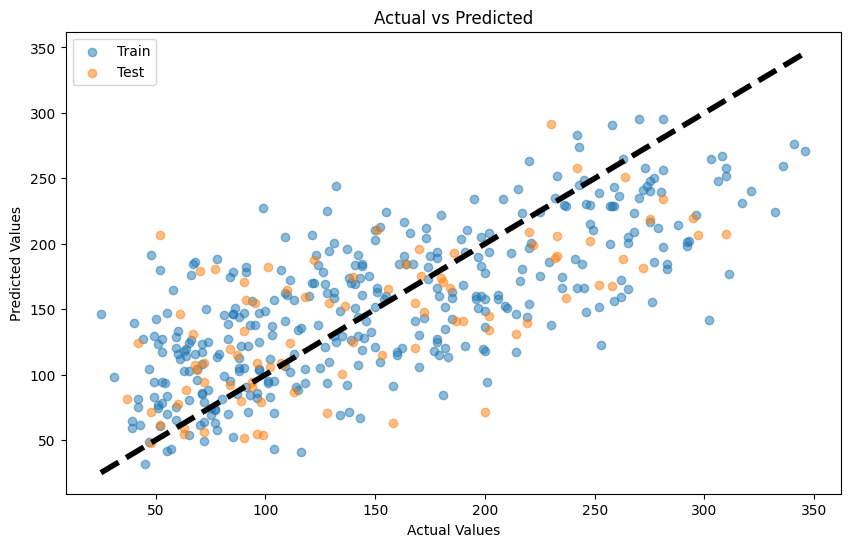

In [11]:
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred, alpha=0.5, label='Test')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [14]:
print('Testing set evaluation:')
print(f"    MSE:{mse(y_test, y_pred)}")
print(f"    MAE:{mae(y_test, y_pred)}")
print(f"    RMSE:{rmse(y_test, y_pred)}")
print(f"    R² score:{r2_score(y_test, y_pred)}")

print("Training set evaluation:")
print(f"    MSE:{mse(y_train, y_train_pred)}")
print(f"    MAE:{mae(y_train, y_train_pred)}")
print(f"    RMSE:{rmse(y_train, y_train_pred)}")
print(f"    R² score:{r2_score(y_train, y_train_pred)}")

Testing set evaluation:
    MSE:2900.193628493482
    MAE:42.794094679599944
    RMSE:53.85344583676593
    R² score:0.45260276297191937
Training set evaluation:
    MSE:2868.5497028355776
    MAE:43.483503523980396
    RMSE:53.55884336723094
    R² score:0.5279193863361498


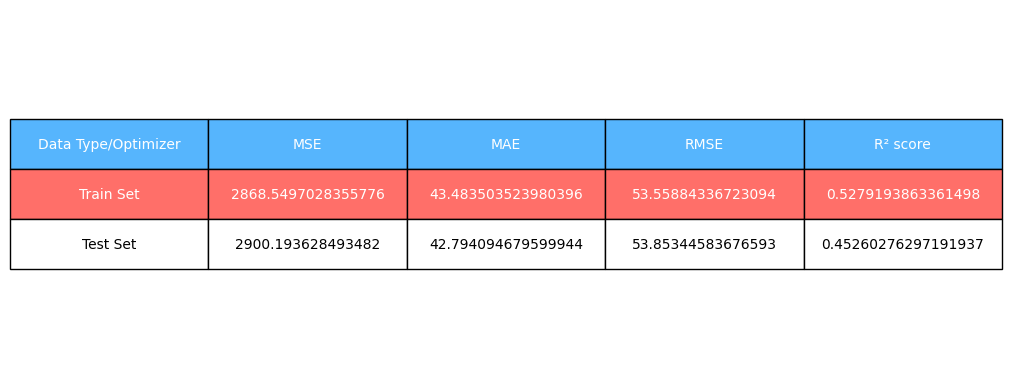

In [15]:
train_metrics = [mse(y_train, y_train_pred), mae(y_train, y_train_pred), rmse(y_train, y_train_pred), r2_score(y_train, y_train_pred)]

test_metrics = [mse(y_test, y_pred), mae(y_test, y_pred), rmse(y_test, y_pred), r2_score(y_test, y_pred)]

data = [['Train Set'] + train_metrics, ['Test Set'] + test_metrics]

columns = ['Data Type/Optimizer', 'MSE', 'MAE', 'RMSE', 'R² score']

fig, ax = plt.subplots()

ax.axis('off')

table = ax.table(cellText=data, colLabels=columns, loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 3)
for i in range(len(data)):
    for j in range(len(columns)):
        cell = table[i, j]
        cell.set_facecolor('#56b5fd' if i % 2 == 0 else '#ff6f69')
        cell.set_text_props(color='w')

plt.show()


### Part 4 : Ordinary Least Squares

In [27]:
y_train_reshaped = np.expand_dims(y_train, axis=0)
X_train_transposed = X_train.T

In [39]:
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           5.41e-50
Time:                        19:22:48   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3456      2.902     52.155      0.0

In [42]:
y_train_pred = results.predict(X_train_const)

X_test_const = sm.add_constant(X_test)
y_test_pred = results.predict(X_test_const)

In [43]:
print("Testing set evaluation:")
print(f"    MSE:{mse(y_test, y_test_pred)}")
print(f"    MAE:{mae(y_test, y_test_pred)}")
print(f"    RMSE:{rmse(y_test, y_test_pred)}")
print(f"    R² score:{r2_score(y_test, y_test_pred)}")

print("Training set evaluation:")
print(f"    MSE:{mse(y_train, y_train_pred)}")
print(f"    MAE:{mae(y_train, y_train_pred)}")
print(f"    RMSE:{rmse(y_train, y_train_pred)}")
print(f"    R² score:{r2_score(y_train, y_train_pred)}")

Testing set evaluation:
    MSE:2900.1936284934827
    MAE:42.794094679599944
    RMSE:53.85344583676594
    R² score:0.45260276297191926
Training set evaluation:
    MSE:2868.549702835578
    MAE:43.483503523980396
    RMSE:53.55884336723094
    R² score:0.5279193863361497
